In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.ticker as mtick




In [2]:
df=pd.read_csv('online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
# Preprocess the data

In [4]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
df.shape

(12330, 18)

In [6]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [8]:
##Exploratory Data Analysis

In [9]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

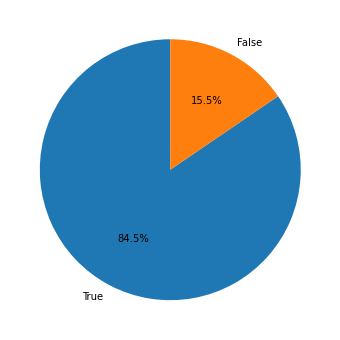

In [10]:
### % of True and false
labels = [True, False]
values = df['Revenue'].value_counts().values
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=False,startangle=90)
plt.show()

In [11]:
def show_count_plot_small(df, col, rotation = 0, figsize=(12,5), hue=None, colors= 'CornflowerBlue'):
    plt.figure(figsize=figsize)
    ax = sns.countplot(x=df[col],
                   order=df[col].value_counts(ascending=False).index, hue=hue, color = colors);
    ax.set_xticklabels(ax.get_xticklabels(),rotation=rotation)      
    abs_values = df[col].value_counts(ascending=False)
    rel_values = df[col].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
    ax.bar_label(container=ax.containers[0], labels=lbls)

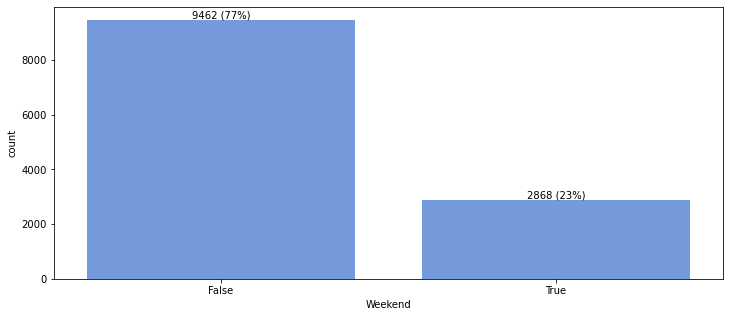

In [12]:
show_count_plot_small(df, 'Weekend')

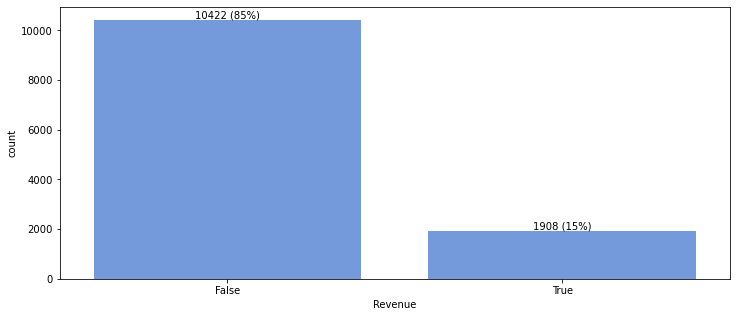

In [13]:
show_count_plot_small(df, 'Revenue')

In [14]:
# Is more than obvious that the month variable can be converted to a number and it's ordinal categorical type as it follows an order.
df['Month'].value_counts()
# As we can see, the variable 'Month' goes from February to December.
# Surprisingly, april is not found in ANY row of the dataset. 

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [15]:
# Assing each month a number. In my case I will use as the natural month numbers within a year.
dic = {'Feb':2, 'Mar':3, 'Apr': 4, 'May':5, 'June':6,
       'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10,
       'Nov': 11, 'Dec': 12}

df["Month"].replace(dic, inplace=True)

In [16]:
# Check out if  the distribution still the same:
print(df['Month'].value_counts())



5     3364
11    2998
3     1907
12    1727
10     549
9      448
8      433
7      432
6      288
2      184
Name: Month, dtype: int64


In [17]:
# Check out if changes have been applied to the dataset:
df['Month'][::2000]

0         2
2000      3
4000      5
6000      8
8000     11
10000    12
12000    11
Name: Month, dtype: int64

In [18]:
# Now focus on the other 3 catergorical value that are:
df[['VisitorType', 'Weekend', 'Revenue']][:15]


,VisitorType,Weekend,Revenue
0,Returning_Visitor,False,False
1,Returning_Visitor,False,False
2,Returning_Visitor,False,False
3,Returning_Visitor,False,False
4,Returning_Visitor,True,False
5,Returning_Visitor,False,False
6,Returning_Visitor,False,False
7,Returning_Visitor,True,False
8,Returning_Visitor,False,False
9,Returning_Visitor,False,False


In [19]:
categorical_list = ['VisitorType', 'Weekend', 'Revenue']

for var in categorical_list:
    print('='*(len(var)))
    print(var)
    print('='*(len(var)))
    print(df[var].value_counts())

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64
Weekend
False    9462
True     2868
Name: Weekend, dtype: int64
Revenue
False    10422
True      1908
Name: Revenue, dtype: int64


In [20]:
# VisitorType can take 3 values. Weekend and Revenue (target) 2 binary values (True/False).
# Replace binary categorical values:
binary_list = ['Weekend', 'Revenue']

for column in binary_list:
    df.loc[df[column] == True, column] = 1
    df.loc[df[column] == False, column] = 0
    df[column] = df[column].astype(int)

In [21]:
# Variable VisitorType takes most of values as 'Returning_Visitor', therefore 1 are asigned to 'Returning_Visitor' class and 0 to the rest.

df.loc[df['VisitorType'] != 'Returning_Visitor', 'VisitorType'] = 0
df.loc[df['VisitorType'] == 'Returning_Visitor', 'VisitorType'] = 1
df['VisitorType'] = df['VisitorType'].astype(int)

In [22]:
# Check out new dataset:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,1,0


In [23]:
# Split features and target variable
X = df.drop(['Revenue'], axis=1)
y = df['Revenue']

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [25]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [30]:
# Predict revenue and weekend
predictions = model.predict(X)
revenue_predictions = predictions
weekend_predictions = df['Weekend']



In [31]:
# Calculate accuracy
accuracy = accuracy_score(y, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [32]:
# Print revenue and weekend predictions
print("Revenue Predictions:", revenue_predictions)
print("Weekend Predictions:", weekend_predictions)

Revenue Predictions: [0 0 0 ... 0 0 0]
Weekend Predictions: 0        0
1        0
2        0
3        0
4        1
        ..
12325    1
12326    1
12327    1
12328    0
12329    1
Name: Weekend, Length: 12330, dtype: int32
